In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns  
import os

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 


In [9]:
!pip install seaborn
# 数据安装

NameError: name '数据安装' is not defined

## 文件数据处理模块信息

os.walk(dirpath) 使用深度遍历的方式进行文件夹的遍历和操作
https://blog.csdn.net/qq_37344125/article/details/107972463


    for roots,dirs,files in os.walk(dirpath):
        root保存的就是当前遍历的文件夹的绝对路径；
        dirs保存当前文件夹下的所有子文件夹的名称（仅一层，孙子dir不包括）
        files保存当前文件夹下的所有文件的名称


In [3]:
import os
for dirname, _, filenames in os.walk('..'):
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk('/kaggle/input/'):
    # filenames 有两个，第一个是空的，第二个是有数据的所以，下面的一层循环只是对第二个filenames进行遍历操作
    # dirname 是指的是源文件夹路径和当前该文件夹下的文件夹路径
    print(filenames)
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))

    # Result is follow!
    # house_state.csv
    # /kaggle/input/us-election-2020/house_state.csv



COMMIT_EDITMSG
..\.git\COMMIT_EDITMSG
config
..\.git\config
description
..\.git\description
FETCH_HEAD
..\.git\FETCH_HEAD
HEAD
..\.git\HEAD
index
..\.git\index
ORIG_HEAD
..\.git\ORIG_HEAD
packed-refs
..\.git\packed-refs
applypatch-msg.sample
..\.git\hooks\applypatch-msg.sample
commit-msg.sample
..\.git\hooks\commit-msg.sample
fsmonitor-watchman.sample
..\.git\hooks\fsmonitor-watchman.sample
post-update.sample
..\.git\hooks\post-update.sample
pre-applypatch.sample
..\.git\hooks\pre-applypatch.sample
pre-commit.sample
..\.git\hooks\pre-commit.sample
pre-merge-commit.sample
..\.git\hooks\pre-merge-commit.sample
pre-push.sample
..\.git\hooks\pre-push.sample
pre-rebase.sample
..\.git\hooks\pre-rebase.sample
pre-receive.sample
..\.git\hooks\pre-receive.sample
prepare-commit-msg.sample
..\.git\hooks\prepare-commit-msg.sample
push-to-checkout.sample
..\.git\hooks\push-to-checkout.sample
update.sample
..\.git\hooks\update.sample
exclude
..\.git\info\exclude
HEAD
..\.git\logs\HEAD
main
..\.git\l

## Pandas 数据处理模块
    读取文件和保存文件
    pandas.read_csv()
    
    合并数据集
    dataFrame 数据集采用左右连接的方式进行数据DataFrame 数据的扩展  left or right join concept 
    governors_data = governors_county.merge(governors_candidate, how="left",on=["state","county"])


    创建新的数据集
    使用已有的数据提取或者计算新的数据集
    governors_data["state_county_reported_votes"] = governors_data ["current_votes"]

    删除不适用的数据列
    governors_data.drop(columns=["current_votes","total_votes","votes_x","votes_y"])

    
    使用reindex进行重新构建数据信息 
    重新指定行
    可以使用reindex  index= ['a','b'], 多出来的index，可以使用fill_value 填充fill_value 
    
    重新指定列
    columns_sequence = ["state","county","candidate","party","state_county_candiate_votes","state_county_reported_votes","state_county_total_votes","state_votes","percent","won"]
    governors_data = governors_data.reindex(columns=columns_sequence)

    数据空值填充
    data.fillna(value=0)

    数据空值数量统计
    data.isna().sum()
    

## 数据获取或者保存模块

governors_data.values  #the result is a array
X = array[:,0:8]
Y = array[:,9]

## 数据变换模块
pivot_table 数据透视表 https://blog.csdn.net/qq_55342245/article/details/121673329
won_state_details  = pd.pivot_table(governors_data_df,index=["state"],columns="won",values="party",fill_value=0,aggfunc=lambda x: len(x))

## 数据按照某列的值进行排序
data.sort_values("state_county_candiate_votes",ascending=False))

## SKlearn 数据处理模块



LabelEncoder 是用来对分类型特征值进行编码，即对不连续的数值或文本进行编码 
按照原始数据的大小建立index 并且分别对应

https://blog.csdn.net/weixin_38278334/article/details/82971752
    fit(y)：fit可看作一本空字典，y看作要塞到字典中的词
    transform(y) ：将y转变成索引值。  
    fit_transform(y)相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。
    inverse_transform(y)：根据索引值y获得原始数据

OneHotEncoder
这种表示方式将每一个分类特征变量的m个可能的取值转变成m个二值特征，对于每一条数据这m个值中仅有一个特征值为1，其他的都为0


from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


# 数据集之间的相关操作
from sklearn.model_selection import KFold,cross_val_score,train_test_split

<!--  数据集划分 -->
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# 求取混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# K折交叉验证
kflod = KFold(n_splits=10,shuffle=True,random_state=7)
model = AdaBoostClassifier(n_estimators=30,random_state=7)
results = cross_val_score(model,X,Y,cv=kflod)

In [7]:

from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()


# 1
# 先使用fit 将其转换成为列表，然后是使用tranform 提取index
# 或者直接使用fit_transform 将其转换成为index
test = le.fit([1, 2, 2, 5,6]).classes_

test = le.fit([1, 2, 2,5, 6])
test1 = le.fit_transform([1, 1, 2, 6]) 
print(test1)


test1 = le.fit_transform([1, 1, 2,5, 6]) 
print(test1)

# 2 
# 使用inverse_transform将其恢复成为原来的数组信息
test2 = le.inverse_transform([0, 0, 1, 2,3])
print(test2)


[0 0 1 2]
[0 0 1 2 3]
[1 1 2 5 6]


In [8]:

from sklearn.preprocessing  import OneHotEncoder
enc = OneHotEncoder()

data = enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])  # 注意：第1、2、3列分别有2、3、4个可能的取值
data2 = enc.transform([[0, 1, 3]]).toarray() #要对[0,1,3]进行编码
print(data2)

[[1. 0. 0. 1. 0. 0. 0. 0. 1.]]


## 绘制图形



# sns 进行绘制图形
    sns 绘制热力图 https://www.pianshen.com/article/380864759/
    https://www.freesion.com/article/1117337374/
    





### plt 绘制图形
#### plt 绘制条形图
plt.figure(figsize=(25,5))
plt.bar("state","state_county_candiate_votes",data=governors_data_df[governors_data_df["won"]==True].sort_values("state_county_candiate_votes",ascending=False))
plt.show()



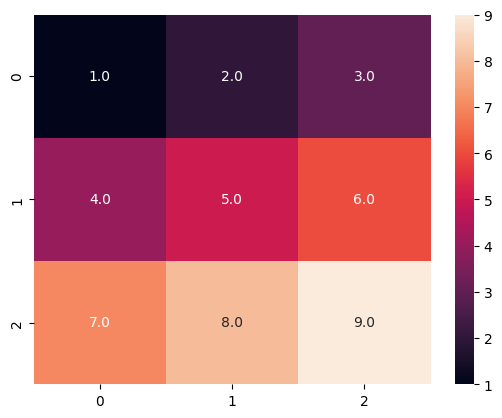

In [15]:
import seaborn as sns
import numpy as np

data = np.array([[1,2,3],[4,5,6],[7,8,9]])
sns.heatmap(data,annot=True,fmt=".1f")
plt.show()